**Семенов Вячеслав Андреевич, ИУ5-63Б, РК 2, Вариант 13**

Задание: Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Метод №1: Дерево решений

Метод №2: Случайный лес

Датасет: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset (файл marvel-wikia-data.csv)

In [34]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.core.display import HTML 
from sklearn.tree import export_text 
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_predict 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier


In [35]:
df = pd.read_csv('marvel-wikia-data.csv')

In [36]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [38]:
df = df.drop(['page_id'], axis=1)
df = df.drop(['urlslug'], axis=1) 
df = df.drop(['GSM'], axis=1) 
df = df.drop(['name'], axis=1) 
df.isnull().sum()

ID                  3770
ALIGN               2812
EYE                 9767
HAIR                4264
SEX                  854
ALIVE                  3
APPEARANCES         1096
FIRST APPEARANCE     815
Year                 815
dtype: int64

In [39]:
#Удаление строк с пустыми значениями
df = df.dropna(axis=0)

In [40]:
df.isnull().sum()

ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

In [41]:
df.shape

(4402, 9)

In [42]:
df['FIRST APPEARANCE'] = df['FIRST APPEARANCE'].str.slice(stop=-3)

In [43]:
#Кодирование категориальных признаков
df['ID'] = pd.Categorical(df['ID'])
df['ID'] = df['ID'].cat.codes
df['ALIGN'] = pd.Categorical(df['ALIGN'])
df['ALIGN'] = df['ALIGN'].cat.codes
df['EYE'] = pd.Categorical(df['EYE'])
df['EYE'] = df['EYE'].cat.codes
df['HAIR'] = pd.Categorical(df['HAIR'])
df['HAIR'] = df['HAIR'].cat.codes
df['SEX'] = pd.Categorical(df['SEX'])
df['SEX'] = df['SEX'].cat.codes
df['ALIVE'] = pd.Categorical(df['ALIVE'])
df['ALIVE'] = df['ALIVE'].cat.codes
df['FIRST APPEARANCE'] = pd.Categorical(df['FIRST APPEARANCE'])
df['FIRST APPEARANCE'] = df['FIRST APPEARANCE'].cat.codes

In [44]:
df.shape

(4402, 9)

In [45]:
df.head()

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,3,1,8,5,3,1,4043.0,1,1962.0
1,2,1,3,20,3,1,3360.0,7,1941.0
2,2,2,3,2,3,1,3061.0,10,1974.0
3,2,1,3,2,3,1,2961.0,7,1963.0
4,1,1,3,3,3,1,2258.0,9,1950.0


Создаем матрицу корелляций и визуализируем ее с помощью тепловой карты, чтобы оценить связи между признаками в данных.

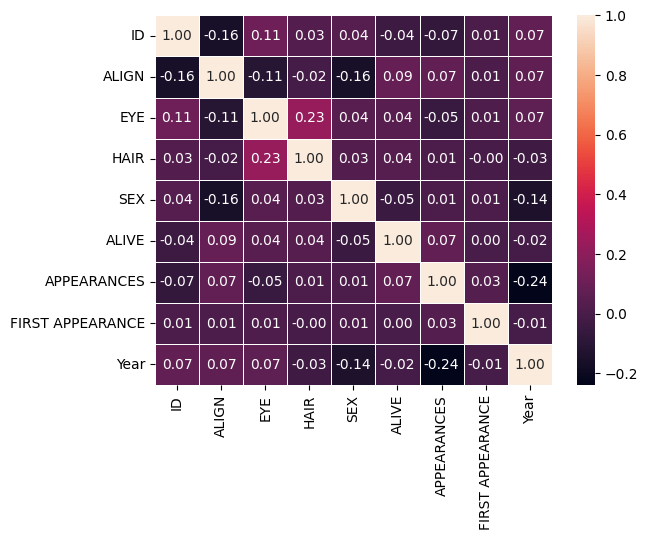

In [46]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True, fmt=".2f")
plt.show()

In [47]:
X = df.drop(['ALIGN'], axis=1) #Наименования признаков
y = df['ALIGN'] # Значения признаков

In [48]:
# кодируем категориальные  данные  из  строк  в  числа
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [50]:
# Размер обучающей  выборки
X_train.shape, y_train.shape

((3521, 8), (3521,))

In [51]:
# Размер тестовой  выборки
X_test.shape, y_test.shape

((881, 8), (881,))

In [52]:
dt_none = DecisionTreeRegressor(max_depth=5) 
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

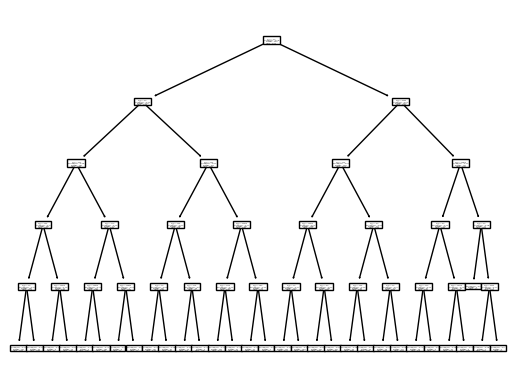

In [53]:
tree.plot_tree(dt_none);

In [54]:
clf = DecisionTreeClassifier(random_state=1) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [55]:
def test_model(model): 
    print("mean_absolute_error:",
        mean_absolute_error(y_test, model.predict(X_test))) 
    print("median_absolute_error:",
        median_absolute_error(y_test, model.predict(X_test))) 
    print("r2_score:",
        r2_score(y_test, model.predict(X_test)))

In [56]:
test_model(dt_none)

mean_absolute_error: 0.6627020797218681
median_absolute_error: 0.603585657370518
r2_score: 0.018109588178918057


In [57]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18, 5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse=True)
    
    # Названия признаков
    labels = [x for x, _ in sorted_list]
    # Важности признаков
    data = [x for _, x in sorted_list]
    
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    
    # Вывод значений
    for a, b in zip(ind, data):
        plt.text(a - 0.05, b + 0.01, str(round(b, 3)))
    
    plt.show()
    
    return labels, data

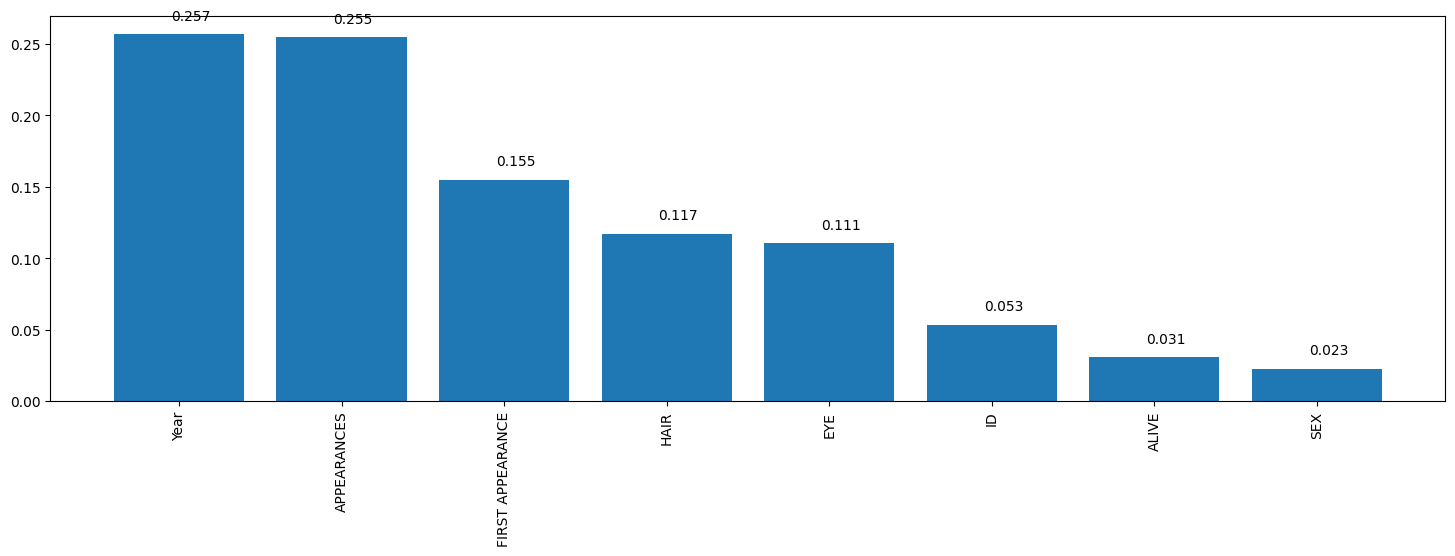

In [58]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)

In [59]:
tree = DecisionTreeClassifier()

param_grid = {'max_depth': [2, 4, 6, 8, 10],
                'min_samples_split': [2, 4, 6, 8, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5]} 
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5) 
grid_search.fit(X_train, y_train)
accuracy_tree = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие   параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_tree)


Наилучшие   параметры: {}  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Оценка точности на кросс-валидации: 0.37
0.4699205448354143


In [60]:
models = [['DecisionTree :',DecisionTreeRegressor()]]

In [61]:
print('Вывод 1')
for name,model in models:
    model = model 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Вывод 1
DecisionTree : 1.0599241829266757


In [62]:
models = [['DecisionTree:', DecisionTreeRegressor(max_depth=6)],
          ['Линейная регрессия:', LinearRegression(normalize=True)],
          ['SVC:', SVC(C=1, kernel='linear')]]

In [63]:
print('Вывод 2')
for name,model in models:
    model = model 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Вывод 2
DecisionTree: 0.8103516038630592
Линейная регрессия: 0.7632120587824478
SVC: 0.9385186482544995


In [64]:
# Создаем модель  случайного  леса  с  100 деревьями
rf_model = RandomForestClassifier(n_estimators=100)
# Обучаем модель  на  тренировочных  данных
rf_model.fit(X_train, y_train)
# Оцениваем  качество  модели  на  тестовых  данных
accuracy = rf_model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))


Accuracy: 43.13%


In [65]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 700], 
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5) 
grid_search.fit(X_train, y_train)
accuracy_RandomForestClassifier = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие   параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_tree)


Наилучшие   параметры: {}  {'max_features': 'auto', 'n_estimators': 200}
Оценка точности на кросс-валидации: 0.32
0.4699205448354143
